# Introduction
The project below investigates 2019 Trends in International Math and Science Study (TIMSS) Data for 8th graders.

_Source: [2019 TIMSS Database](https://timss2019.org/international-database/)_

### Questions of Interest
1. How does a student's enviroment at home, in the classroom, and at school affect academic understanding?
2. Are there specific teacher behaviors that lead to improved understanding in specific disciplines?
3. What can students and teachers do to improve student academic understanding?

The project will cover a variety of analyses regarding vast data collected. The project will include:
* prediction of student score based on student attitudes and demographics, school characteristics
* prediction of student scores based on teacher attitudes and practices
* recommendation engine for additional study problems for a given student (or group of students from a school or country)
* recommendation engine for areas of investment or professional development for a given teacher (or group of teachers from a school or country)

In [148]:
# import necessary libraries
import pandas as pd
import numpy as np
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import random
import re
from pandas.api.types import CategoricalDtype
pd.options.display.max_columns = None
pd.options.display.max_rows = 100

# Load Data
Import the 2019 TIMSS Data into six separate dataframes

In [18]:
meta = pyreadstat.read_sav('T19_G8_SPSS Data/bsaaadm7.sav', metadataonly=True)
stud_ach_cols = meta[0].columns[:1265]

In [20]:
school = 0
stud_ach = 0
student = 0
stud_teach = 0
math_teach = 0
sci_teach = 0
for file in glob.glob('T19_G8_SPSS Data/*.sav'):
    print(file)
    if re.search('bcg',file) != None:
        school_cols = ['IDCNTRY','IDSCHOOL','IDPOP','IDGRADER','IDGRADE','ITLANG_C','LCID_C','BCBGDAS','BCBGEAS','BCBGMRS','BCBGSRS','BCDGDAS','BCDGEAS','BCDGMRS','BCDGSRS','BCDGSBC','BCDGTIHY']
        try:
            school = school.append(pd.read_spss(file, usecols=school_cols), ignore_index=True, sort=False)
        except:
            school = pd.read_spss(file, usecols=school_cols)
    elif re.search('bsa',file) != None:
        try:
            stud_ach = stud_ach.append(pd.read_spss(file, usecols=stud_ach_cols), ignore_index=True, sort=False)
        except:
            stud_ach = pd.read_spss(file, usecols=stud_ach_cols)
    elif re.search('bsg',file) != None:
        student_cols = ['IDCNTRY','IDBOOK','IDSCHOOL','IDCLASS','IDSTUD','BSBG01','BSBG03','BSBG04','BSBG05A','BSBG05B','BSBG05C','BSBG05D','BSBG05E','BSBG05F','BSBG05G','BSBG05H','BSBG05I','BSBG06A','BSBG06B','BSBG07','BSBG08A','BSBG08B','BSBG09A','BSBG09B','BSBG10','BSBG11A','BSBG11B','BSBG12A','BSBG12B','BSBG12C','BSBG12D','BSBG12E','BSBG12F','IDPOP','IDGRADE','ITLANG_SQ','LCID_SQ','ITLANG_SA','LCID_SA','ITSEX','BSDAGE','BSBGHER','BSDGHER','BSBGSSB','BSDGSSB','BSBGSB','BSDGSB','BSBGSLM','BSDGSLM','BSBGICM','BSDGICM','BSBGDML','BSDGDML','BSBGSCM','BSDGSCM','BSBGSVM','BSDGSVM','BSBGSLS','BSDGSLS','BSBGICS','BSDGICS','BSBGSCS','BSDGSCS','BSBGSVS','BSDGSVS','BSBGSLB','BSDGSLB','BSBGICB','BSDGICB','BSBGSCB','BSDGSCB','BSBGSLE','BSDGSLE','BSBGICE','BSDGICE','BSBGSCE','BSDGSCE','BSBGSLC','BSDGSLC','BSBGICC','BSDGICC','BSBGSCC','BSDGSCC','BSBGSLP','BSDGSLP','BSBGICP','BSDGICP','BSBGSCP','BSDGSCP','BSBGSEC','BSDGSEC', 'BSDG05S','BSDGEDUP']
        try:
            student = student.append(pd.read_spss(file, usecols=student_cols), ignore_index=True, sort=False)
        except:
            student = pd.read_spss(file, usecols=student_cols)
    elif re.search('bst',file) != None:
        stud_teach_cols = ['IDCNTRY', 'IDBOOK', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEALIN', 'IDTEACH','IDLINK', 'IDPOP', 'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'NMTEACH','NSTEACH']
        try:
            stud_teach = stud_teach.append(pd.read_spss(file, usecols=stud_teach_cols), ignore_index=True, sort=False)
        except:
            stud_teach = pd.read_spss(file, usecols=stud_teach_cols)
    elif re.search('btm',file) != None:
        try:
            math_teach = math_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            math_teach = pd.read_spss(file)
    elif re.search('bts',file) != None:
        try:
            sci_teach = sci_teach.append(pd.read_spss(file), ignore_index=True, sort=False)
        except:
            sci_teach = pd.read_spss(file)

T19_G8_SPSS Data\bcgaadm7.sav
T19_G8_SPSS Data\bcgadum7.sav
T19_G8_SPSS Data\bcgareb7.sav
T19_G8_SPSS Data\bcgarem7.sav
T19_G8_SPSS Data\bcgausm7.sav
T19_G8_SPSS Data\bcgbhrm7.sav
T19_G8_SPSS Data\bcgchlb7.sav
T19_G8_SPSS Data\bcgchlm7.sav
T19_G8_SPSS Data\bcgcotm7.sav
T19_G8_SPSS Data\bcgcqum7.sav
T19_G8_SPSS Data\bcgcypm7.sav
T19_G8_SPSS Data\bcgegym7.sav
T19_G8_SPSS Data\bcgengb7.sav
T19_G8_SPSS Data\bcgengm7.sav
T19_G8_SPSS Data\bcgfinm7.sav
T19_G8_SPSS Data\bcgfram7.sav
T19_G8_SPSS Data\bcggeob7.sav
T19_G8_SPSS Data\bcggeom7.sav
T19_G8_SPSS Data\bcghkgb7.sav
T19_G8_SPSS Data\bcghkgm7.sav
T19_G8_SPSS Data\bcghunb7.sav
T19_G8_SPSS Data\bcghunm7.sav
T19_G8_SPSS Data\bcgirlm7.sav
T19_G8_SPSS Data\bcgirnm7.sav
T19_G8_SPSS Data\bcgisrb7.sav
T19_G8_SPSS Data\bcgisrm7.sav
T19_G8_SPSS Data\bcgitab7.sav
T19_G8_SPSS Data\bcgitam7.sav
T19_G8_SPSS Data\bcgjorm7.sav
T19_G8_SPSS Data\bcgjpnm7.sav
T19_G8_SPSS Data\bcgkazm7.sav
T19_G8_SPSS Data\bcgkorb7.sav
T19_G8_SPSS Data\bcgkorm7.sav
T19_G8_SPS

In [21]:
math_teach_drop_cols = ['BTBM18','BTBM22','VERSION','SCOPE']
for drop_head in math_teach_drop_cols:
    drop_cols = [col for col in math_teach.columns if drop_head in col]
math_teach.drop(columns=drop_cols,inplace=True)

In [22]:
sci_teach_drop_cols = ['BTBS17','BTBS21','VERSION','SCOPE']
for drop_head in sci_teach_drop_cols:
    drop_cols = [col for col in sci_teach.columns if drop_head in col]
sci_teach.drop(columns=drop_cols,inplace=True)

In [49]:
file_name = 'T19_G8_Codebooks/T19_G8_Codebook.xlsx'
school_codes = pd.read_excel(file_name, sheet_name='BCGM7').set_index('Variable').iloc[:,:1]
stud_ach_codes = pd.read_excel(file_name, sheet_name='BSAM7').set_index('Variable').iloc[:,:1]
student_codes = pd.read_excel(file_name, sheet_name='BSGM7').set_index('Variable').iloc[:,:1]
stud_teach_codes = pd.read_excel(file_name, sheet_name='BSTM7').set_index('Variable').iloc[:,:1]
math_teach_codes = pd.read_excel(file_name, sheet_name='BTMM7').set_index('Variable').iloc[:,:1]
sci_teach_codes = pd.read_excel(file_name, sheet_name='BTSM7').set_index('Variable').iloc[:,:1]

In [51]:
stud_teach_codes.head()

,Label
Variable,
IDCNTRY,Country ID - Numeric ISO Code
IDBOOK,Student Test Booklet
IDSCHOOL,School ID
IDCLASS,Class ID
IDSTUD,Student ID


### Preprocessing Data
Preprocess the data to remove non-relevant information and variables

In [52]:
def binary_scores(answer): 
    try: 
        float(answer)
        return np.nan
    except:
        if '*' in answer or ('CORRECT' in answer and 'INCORRECT' not in answer):
            return 1
        elif '*' not in answer or ('INCORRECT' in answer):
            return 0
        else:
            return np.nan

In [53]:
def nanor(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(any(t))
    
def nanand(t):
    t = list(filter(lambda x: str(x) != 'nan', t))
    if len(t) == 0:
        return np.nan
    else:
        return int(all(t))

In [54]:
paper_cols_all = [col1 for col1 in list(stud_ach.columns) if (col1[1] == 'P' and col1[-4:] != '_val')]
for col1 in paper_cols_all:
    paper_cols = [str(col2) for col2 in list(stud_ach.columns) if (col1[:7] in col2 and col2[-4:] != '_val')]
    elec_cols = [col3 for col3 in list(stud_ach.columns) if (col1[2:7] in col3 and col1[0] == col3[0] and col3[1] == 'E')]
    print(col1, paper_cols + elec_cols)
    for col in paper_cols+elec_cols:
        stud_ach[col] = stud_ach[col].apply(binary_scores)
    if len(paper_cols) > 0:
        stud_ach[paper_cols[0]] = stud_ach.loc[:,paper_cols].apply(nanand, axis=1)
        stud_ach[elec_cols[0]] = stud_ach.loc[:,elec_cols].apply(nanand, axis=1)
        stud_ach[col1[:7]+'_val'] = stud_ach.loc[:,[paper_cols[0],elec_cols[0]]].apply(nanor, axis=1)
        stud_ach.drop(columns=paper_cols+elec_cols, inplace=True)

MP52024 ['MP52024', 'ME52024']
MP52058A ['MP52058A', 'MP52058B', 'ME52058A', 'ME52058B']
MP52058B []
MP52125 ['MP52125', 'ME52125']
MP52229 ['MP52229', 'ME52229']
MP52063 ['MP52063', 'ME52063']
MP52072 ['MP52072', 'ME52072']
MP52146A ['MP52146A', 'MP52146B', 'ME52146A', 'ME52146B']
MP52146B []
MP52092 ['MP52092', 'ME52092']
MP52046 ['MP52046', 'ME52046']
MP52083 ['MP52083', 'ME52083']
MP52082 ['MP52082', 'ME52082']
MP52161 ['MP52161', 'ME52161']
MP52418A ['MP52418A', 'MP52418B', 'ME52418A', 'ME52418B']
MP52418B []
MP72007A ['MP72007A', 'MP72007B', 'MP72007C', 'MP72007D', 'MP72007E', 'MP72007', 'ME72007A', 'ME72007B', 'ME72007C', 'ME72007D', 'ME72007E', 'ME72007']
MP72007B []
MP72007C []
MP72007D []
MP72007E []
MP72007 []
MP72025 ['MP72025', 'ME72025']
MP72017 ['MP72017', 'ME72017']
MP72190 ['MP72190', 'ME72190']
MP72068 ['MP72068', 'ME72068']
MP72076 ['MP72076', 'ME72076']
MP72056 ['MP72056', 'ME72056']
MP72098 ['MP72098', 'ME72098']
MP72103 ['MP72103', 'ME72103']
MP72121 ['MP72121', '

In [55]:
scores = ['MMAT','SSCI','MALG','MAPP','MDAT','MGEO','MKNO','MNUM','MREA','SAPP','SBIO','SCHE','SEAR','SKNO','SPHY','SREA']
for item in scores:
    sub_col = [col for col in stud_ach.columns if item in col]
    print(sub_col)
    stud_ach[item.lower()+'_avg'] = stud_ach.loc[:,sub_col].mean(axis=1)
    stud_ach[item.lower()+'_sd'] = stud_ach.loc[:,sub_col].std(axis=1)
    stud_ach.drop(sub_col, axis = 1, inplace=True)

['BSMMAT01', 'BSMMAT02', 'BSMMAT03', 'BSMMAT04', 'BSMMAT05']
['BSSSCI01', 'BSSSCI02', 'BSSSCI03', 'BSSSCI04', 'BSSSCI05']
['BSMALG01', 'BSMALG02', 'BSMALG03', 'BSMALG04', 'BSMALG05']
['BSMAPP01', 'BSMAPP02', 'BSMAPP03', 'BSMAPP04', 'BSMAPP05']
['BSMDAT01', 'BSMDAT02', 'BSMDAT03', 'BSMDAT04', 'BSMDAT05']
['BSMGEO01', 'BSMGEO02', 'BSMGEO03', 'BSMGEO04', 'BSMGEO05']
['BSMKNO01', 'BSMKNO02', 'BSMKNO03', 'BSMKNO04', 'BSMKNO05']
['BSMNUM01', 'BSMNUM02', 'BSMNUM03', 'BSMNUM04', 'BSMNUM05']
['BSMREA01', 'BSMREA02', 'BSMREA03', 'BSMREA04', 'BSMREA05']
['BSSAPP01', 'BSSAPP02', 'BSSAPP03', 'BSSAPP04', 'BSSAPP05']
['BSSBIO01', 'BSSBIO02', 'BSSBIO03', 'BSSBIO04', 'BSSBIO05']
['BSSCHE01', 'BSSCHE02', 'BSSCHE03', 'BSSCHE04', 'BSSCHE05']
['BSSEAR01', 'BSSEAR02', 'BSSEAR03', 'BSSEAR04', 'BSSEAR05']
['BSSKNO01', 'BSSKNO02', 'BSSKNO03', 'BSSKNO04', 'BSSKNO05']
['BSSPHY01', 'BSSPHY02', 'BSSPHY03', 'BSSPHY04', 'BSSPHY05']
['BSSREA01', 'BSSREA02', 'BSSREA03', 'BSSREA04', 'BSSREA05']


In [86]:
stud_ach.drop(columns=[col for col in stud_ach.columns if 'WGT' in col or 'JK' in col], inplace=True)

In [87]:
school.to_csv('data/school.csv', index = False)
stud_ach.to_csv('data/stud_ach.csv', index = False)
student.to_csv('data/student.csv', index = False)
stud_teach.to_csv('data/stud_teach.csv', index = False)
math_teach.to_csv('data/math_teach.csv', index = False)
sci_teach.to_csv('data/sci_teach.csv', index = False)

In [153]:
#school = pd.read_csv('data/school.csv')
#stud_ach = pd.read_csv('data/stud_ach.csv')
#student = pd.read_csv('data/student.csv')
#stud_teach = pd.read_csv('data/stud_teach.csv')
#math_teach = pd.read_csv('data/math_teach.csv')
#sci_teach = pd.read_csv('data/sci_teach.csv')

# Explore Data
Explore the structure and values of the data

In [57]:
school.head()

,IDCNTRY,IDSCHOOL,IDPOP,IDGRADER,IDGRADE,ITLANG_C,LCID_C,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
0,7842.0,5001.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),9.79606,7.03177,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0
1,7842.0,5004.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),10.10482,9.56054,12.92960,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,More Affluent,1680.0
2,7842.0,5006.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),10.43939,11.35999,8.03304,7.45575,Minor Problems,High Emphasis,Affected,Affected A Lot,More Affluent,1281.0
3,7842.0,5007.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),12.80218,13.19357,12.29366,12.50979,Hardly Any Problems,Very High Emphasis,Not Affected,Not Affected,More Affluent,1311.5
4,7842.0,5008.0,Pop 2,Upper Grade,Grade 8,English,English (U.A.E. Abu Dhabi),14.02858,13.19357,4.23486,4.07624,Hardly Any Problems,Very High Emphasis,Affected A Lot,Affected A Lot,Neither More Affluent nor More Disadvantaged,NaN


In [207]:
list(school.columns[school.isna().all()])+list(school.columns[school.nunique()==1])

['IDPOP', 'IDGRADER']

In [58]:
school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9925 entries, 0 to 9924
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   IDCNTRY   9925 non-null   float64 
 1   IDSCHOOL  9925 non-null   float64 
 2   IDPOP     9925 non-null   category
 3   IDGRADER  9925 non-null   category
 4   IDGRADE   9925 non-null   object  
 5   ITLANG_C  9484 non-null   object  
 6   LCID_C    9484 non-null   object  
 7   BCBGDAS   9373 non-null   float64 
 8   BCBGEAS   9373 non-null   float64 
 9   BCBGMRS   9378 non-null   float64 
 10  BCBGSRS   9379 non-null   float64 
 11  BCDGDAS   9373 non-null   object  
 12  BCDGEAS   9373 non-null   object  
 13  BCDGMRS   9378 non-null   object  
 14  BCDGSRS   9379 non-null   object  
 15  BCDGSBC   8684 non-null   category
 16  BCDGTIHY  8445 non-null   float64 
dtypes: category(3), float64(7), object(7)
memory usage: 1.1+ MB


In [60]:
school.describe()

,IDCNTRY,IDSCHOOL,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGTIHY
count,9925.000000,9925.000000,9373.000000,9373.000000,9378.000000,9379.000000,8445.000000
mean,32131.930982,5139.955264,10.371160,10.213209,10.182964,10.271956,1032.532627
std,142863.345610,121.183429,2.100143,2.114471,1.999650,2.148128,216.999857
min,36.000000,5001.000000,4.100070,2.205220,4.234860,4.076240,435.000000
25%,380.000000,5056.000000,9.014930,8.673410,9.008160,8.925820,895.000000
50%,578.000000,5112.000000,10.439390,10.159690,9.970565,10.047270,1002.000000
75%,784.000000,5180.000000,11.628840,11.359990,11.265110,11.425290,1127.666670
max,710004.000000,5631.000000,14.028580,16.362220,14.255960,14.572410,2500.000000


In [61]:
school.dtypes

IDCNTRY      float64
IDSCHOOL     float64
IDPOP       category
IDGRADER    category
IDGRADE       object
ITLANG_C      object
LCID_C        object
BCBGDAS      float64
BCBGEAS      float64
BCBGMRS      float64
BCBGSRS      float64
BCDGDAS       object
BCDGEAS       object
BCDGMRS       object
BCDGSRS       object
BCDGSBC     category
BCDGTIHY     float64
dtype: object

In [82]:
school_codes.loc[school.columns,:]

,Label
IDCNTRY,Country ID - Numeric ISO Code
IDSCHOOL,School ID
IDPOP,Population ID
IDGRADER,Standardized Grade ID
IDGRADE,Grade ID
ITLANG_C,Language of School Questionnaire
LCID_C,Locale ID of School Questionnaire
BCBGDAS,School Discipline Problems-Prncpl/SCL
BCBGEAS,School Emph on Acad Success-Prncpl/SCL
BCBGMRS,Instr Aff by Mat Res Shortage-Prncpl/SCL


In [187]:
school.sample(5).loc[:,[col for col in school.columns if "BC" in col]]

,BCBGDAS,BCBGEAS,BCBGMRS,BCBGSRS,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
8033,12.80218,13.19357,14.25596,14.57241,Hardly Any Problems,Very High Emphasis,Not Affected,Not Affected,More Affluent,1023.0
5433,10.10482,9.56054,9.96435,9.92393,Minor Problems,Medium Emphasis,Affected,Affected,More Affluent,832.5
8877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5623,5.19150,8.67341,9.96435,10.04727,Moderate to Severe Problems,Medium Emphasis,Affected,Affected,More Disadvantaged,1288.0
7342,9.25300,7.73586,7.87145,7.45575,Minor Problems,Medium Emphasis,Affected,Affected A Lot,More Affluent,1249.5


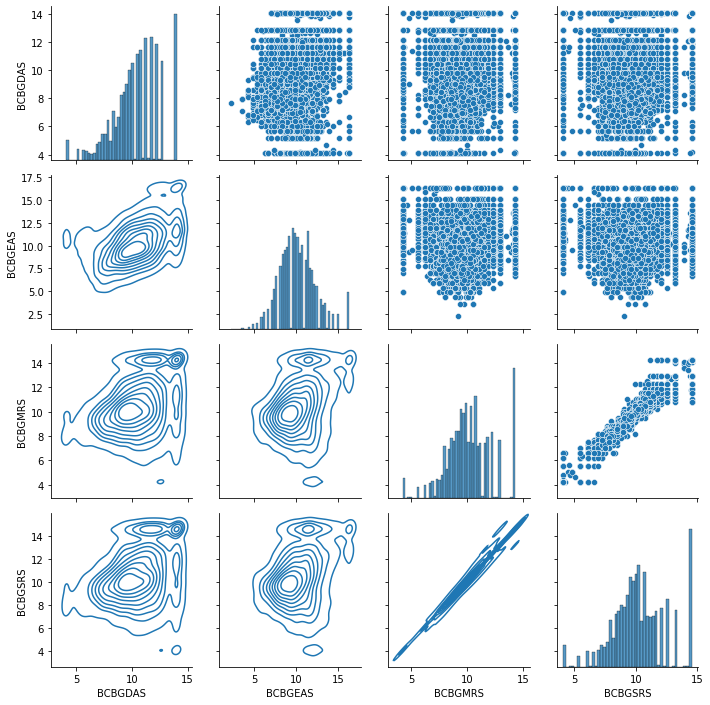

In [92]:
g = sns.PairGrid(school.loc[:,[col for col in school.columns if 'BCBG' in col]])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `school` dataset:**
* 

In [93]:
stud_ach.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BNRGCAL1,BNRGCAL2,IDPOP,IDGRADER,IDGRADE,ITLANG_SA,LCID_SA,ITSEX,BSDAGE,ITADMINI,ILRELIAB,MP52024_val,MP52058_val,MP52125_val,MP52229_val,MP52063_val,MP52072_val,MP52146_val,MP52092_val,MP52046_val,MP52083_val,MP52082_val,MP52161_val,MP52418_val,MP72007_val,MP72025_val,MP72017_val,MP72190_val,MP72068_val,MP72076_val,MP72056_val,MP72098_val,MP72103_val,MP72121_val,MP72180_val,MP72198_val,MP72227_val,MP72170_val,MP72209_val,MP62005_val,MP62139_val,MP62164_val,MP62142_val,MP62084_val,MP62351_val,MP62223_val,MP62027_val,MP62174_val,MP62244_val,MP62261_val,MP62300_val,MP62254_val,MP62132_val,MP72178_val,MP72234_val,MP72020_val,MP72027_val,MP72052_val,MP72067_val,MP72083_val,MP72108_val,MP72181_val,MP72126_val,MP72164_val,MP72185_val,MP52413_val,MP52134_val,MP52078_val,MP52034_val,MP52174_val,MP52130_val,MP52073_val,MP52110_val,MP52105_val,MP52407_val,MP52036_val,MP52502_val,MP52117_val,MP52426_val,MP62150_val,MP62335_val,MP62219_val,MP62002_val,MP62149_val,MP62241_val,MP62342_val,MP62105_val,MP62040_val,MP62288_val,MP62173_val,MP62133_val,MP62123_val,MP52079_val,MP52204_val,MP52364_val,MP52215_val,MP52147_val,MP52067_val,MP52068_val,MP52087_val,MP52048_val,MP52039_val,MP52208_val,MP52419_val,MP52115_val,MP52421_val,MP72002_val,MP72188_val,MP72035_val,MP72055_val,MP72222_val,MP72090_val,MP72233_val,MP72106_val,MP72128_val,MP72119_val,MP72153_val,MP72172_val,MP62329_val,MP62151_val,MP62346_val,MP62212_val,MP62056_val,MP62317_val,MP62350_val,MP62078_val,MP62284_val,MP62245_val,MP62287_val,MP62345_val,MP62115_val,MP72187_val,MP72022_val,MP72038_val,MP72045_val,MP72049_val,MP72069_val,MP72074_val,MP72013_val,MP72095_val,MP72109_val,MP72125_val,MP72196_val,MP72237_val,MP72232_val,MP72206_val,MP62271_val,MP62152_val,MP62215_val,MP62143_val,MP62230_val,MP62095_val,MP62076_val,MP62030_val,MP62171_val,MP62301_val,MP62194_val,MP62344_val,MP62320_val,MP62296_val,MP72001_val,MP72019_val,MP72189_val,MP72024_val,MP72043_val,MP72221_val,MP72220_val,MP72225_val,MP72110_val,MP72150_val,MP72139_val,MP72229_val,MP72171_val,MP72211_val,MP62001_val,MP62214_val,MP62146_val,MP62154_val,MP62067_val,MP62341_val,MP62242_val,MP62250_val,MP62170_val,MP62192_val,MP62072_val,MP62048_val,MP62120_val,MP72005_val,MP72021_val,MP72026_val,MP72041_val,MP72223_val,MP72094_val,MP72059_val,MP72080_val,MP72081_val,MP72140_val,MP72120_val,MP72131_val,MP72147_val,MP72154_val,MP72192_val,MP72161_val,SP52006_val,SP52069_val,SP52012_val,SP52021_val,SP52095_val,SP52134_val,SP52054_val,SP52150_val,SP52243_val,SP52206_val,SP52112_val,SP52294_val,SP72072_val,SP72029_val,SP72902_val,SP72077_val,SP72900_val,SP72103_val,SP72110_val,SP72130_val,SP72148_val,SP72200_val,SP72232_val,SP72275_val,SP72244_val,SP72301_val,SP72721_val,SP72335_val,SP62055_val,SP62007_val,SP62275_val,SP62225_val,SP62111_val,SP62116_val,SP62262_val,SP62035_val,SP62144_val,SP62162_val,SP62233_val,SP62272_val,SP62171_val,SP72002_val,SP72403_val,SP72021_val,SP72082_val,SP72066_val,SP72063_val,SP72102_val,SP72141_val,SP72921_val,SP72234_val,SP72251_val,SP72284_val,SP72345_val,SP72349_val,SP72363_val,SP52076_val,SP52272_val,SP52085_val,SP52094_val,SP52248_val,SP52146_val,SP52282_val,SP52299_val,SP52144_val,SP52214_val,SP52221_val,SP52101_val,SP52113_val,SP52107_val,SP62090_val,SP62274_val,SP62284_val,SP62098_val,SP62032_val,SP62043_val,SP62158_val,SP62159_val,SP62005_val,SP62075_val,SP62004_val,SP62175_val,SP62173_val,SP52090_val,SP52262_val,SP52267_val,SP52273_val,SP52015_val,SP52051_val,SP52026_val,SP52130_val,SP52028_val,SP52189_val,SP52217_val,SP52038_val,SP52099_val,SP52118_val,SP72070_val,SP72400_val,SP72024_val,SP72462_val,SP72443_val,SP72903_val,SP72145_val,SP72100_val,SP72133_val,SP72137_val,SP72298_val,SP72215_val,SP72260_val,SP72265_val,SP72347_val,SP72351_val,SP72367_val,SP62099_val,SP62095_val,SP62106_val,SP62064_val,SP62132_val,SP62163_val,SP62153_val,SP62018_val,SP62143_val,SP62276_val,SP62050_val,SP62205_val,SP62190_val,SP62024_val,SP72033_val,SP72440_val,SP7203

In [206]:
list(stud_ach.columns[stud_ach.isna().all()])+list(stud_ach.columns[stud_ach.nunique()==1])

['MP62342_val',
 'MP72038_val',
 'MP62048_val',
 'SP62272_val',
 'SP52221_val',
 'SP72133_val',
 'SP72048_val',
 'SP62036_val',
 'SP72906_val',
 'SP72329_val',
 'SP62266_val',
 'IDPOP',
 'IDGRADER']

In [94]:
stud_ach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Columns: 445 entries, IDCNTRY to srea_sd
dtypes: category(4), float64(434), object(7)
memory usage: 995.2+ MB


In [95]:
stud_ach.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,BSDAGE,MP52024_val,MP52058_val,MP52125_val,MP52229_val,MP52063_val,MP52072_val,MP52146_val,MP52092_val,MP52046_val,MP52083_val,MP52082_val,MP52161_val,MP52418_val,MP72007_val,MP72025_val,MP72017_val,MP72190_val,MP72068_val,MP72076_val,MP72056_val,MP72098_val,MP72103_val,MP72121_val,MP72180_val,MP72198_val,MP72227_val,MP72170_val,MP72209_val,MP62005_val,MP62139_val,MP62164_val,MP62142_val,MP62084_val,MP62351_val,MP62223_val,MP62027_val,MP62174_val,MP62244_val,MP62261_val,MP62300_val,MP62254_val,MP62132_val,MP72178_val,MP72234_val,MP72020_val,MP72027_val,MP72052_val,MP72067_val,MP72083_val,MP72108_val,MP72181_val,MP72126_val,MP72164_val,MP72185_val,MP52413_val,MP52134_val,MP52078_val,MP52034_val,MP52174_val,MP52130_val,MP52073_val,MP52110_val,MP52105_val,MP52407_val,MP52036_val,MP52502_val,MP52117_val,MP52426_val,MP62150_val,MP62335_val,MP62219_val,MP62002_val,MP62149_val,MP62241_val,MP62342_val,MP62105_val,MP62040_val,MP62288_val,MP62173_val,MP62133_val,MP62123_val,MP52079_val,MP52204_val,MP52364_val,MP52215_val,MP52147_val,MP52067_val,MP52068_val,MP52087_val,MP52048_val,MP52039_val,MP52208_val,MP52419_val,MP52115_val,MP52421_val,MP72002_val,MP72188_val,MP72035_val,MP72055_val,MP72222_val,MP72090_val,MP72233_val,MP72106_val,MP72128_val,MP72119_val,MP72153_val,MP72172_val,MP62329_val,MP62151_val,MP62346_val,MP62212_val,MP62056_val,MP62317_val,MP62350_val,MP62078_val,MP62284_val,MP62245_val,MP62287_val,MP62345_val,MP62115_val,MP72187_val,MP72022_val,MP72038_val,MP72045_val,MP72049_val,MP72069_val,MP72074_val,MP72013_val,MP72095_val,MP72109_val,MP72125_val,MP72196_val,MP72237_val,MP72232_val,MP72206_val,MP62271_val,MP62152_val,MP62215_val,MP62143_val,MP62230_val,MP62095_val,MP62076_val,MP62030_val,MP62171_val,MP62301_val,MP62194_val,MP62344_val,MP62320_val,MP62296_val,MP72001_val,MP72019_val,MP72189_val,MP72024_val,MP72043_val,MP72221_val,MP72220_val,MP72225_val,MP72110_val,MP72150_val,MP72139_val,MP72229_val,MP72171_val,MP72211_val,MP62001_val,MP62214_val,MP62146_val,MP62154_val,MP62067_val,MP62341_val,MP62242_val,MP62250_val,MP62170_val,MP62192_val,MP62072_val,MP62048_val,MP62120_val,MP72005_val,MP72021_val,MP72026_val,MP72041_val,MP72223_val,MP72094_val,MP72059_val,MP72080_val,MP72081_val,MP72140_val,MP72120_val,MP72131_val,MP72147_val,MP72154_val,MP72192_val,MP72161_val,SP52006_val,SP52069_val,SP52012_val,SP52021_val,SP52095_val,SP52134_val,SP52054_val,SP52150_val,SP52243_val,SP52206_val,SP52112_val,SP52294_val,SP72072_val,SP72029_val,SP72902_val,SP72077_val,SP72900_val,SP72103_val,SP72110_val,SP72130_val,SP72148_val,SP72200_val,SP72232_val,SP72275_val,SP72244_val,SP72301_val,SP72721_val,SP72335_val,SP62055_val,SP62007_val,SP62275_val,SP62225_val,SP62111_val,SP62116_val,SP62262_val,SP62035_val,SP62144_val,SP62162_val,SP62233_val,SP62272_val,SP62171_val,SP72002_val,SP72403_val,SP72021_val,SP72082_val,SP72066_val,SP72063_val,SP72102_val,SP72141_val,SP72921_val,SP72234_val,SP72251_val,SP72284_val,SP72345_val,SP72349_val,SP72363_val,SP52076_val,SP52272_val,SP52085_val,SP52094_val,SP52248_val,SP52146_val,SP52282_val,SP52299_val,SP52144_val,SP52214_val,SP52221_val,SP52101_val,SP52113_val,SP52107_val,SP62090_val,SP62274_val,SP62284_val,SP62098_val,SP62032_val,SP62043_val,SP62158_val,SP62159_val,SP62005_val,SP62075_val,SP62004_val,SP62175_val,SP62173_val,SP52090_val,SP52262_val,SP52267_val,SP52273_val,SP52015_val,SP52051_val,SP52026_val,SP52130_val,SP52028_val,SP52189_val,SP52217_val,SP52038_val,SP52099_val,SP52118_val,SP72070_val,SP72400_val,SP72024_val,SP72462_val,SP72443_val,SP72903_val,SP72145_val,SP72100_val,SP72133_val,SP72137_val,SP72298_val,SP72215_val,SP72260_val,SP72265_val,SP72347_val,SP72351_val,SP72367_val,SP62099_val,SP62095_val,SP62106_val,SP62064_val,SP62132_val,SP62163_val,SP62153_val,SP62018_val,SP62143_val,SP62276_val,SP62050_val,SP62205_val,SP62190_val,SP62024_val,SP72033_val,SP72440_val,SP72032_val,SP72031_val,SP72086_val,SP72005_val,SP72048_val,SP72123_val,SP72116_val,SP72920_val,

In [97]:
stud_ach.dtypes

IDCNTRY     float64
IDBOOK       object
IDSCHOOL    float64
IDCLASS     float64
IDSTUD      float64
             ...   
skno_sd     float64
sphy_avg    float64
sphy_sd     float64
srea_avg    float64
srea_sd     float64
Length: 445, dtype: object

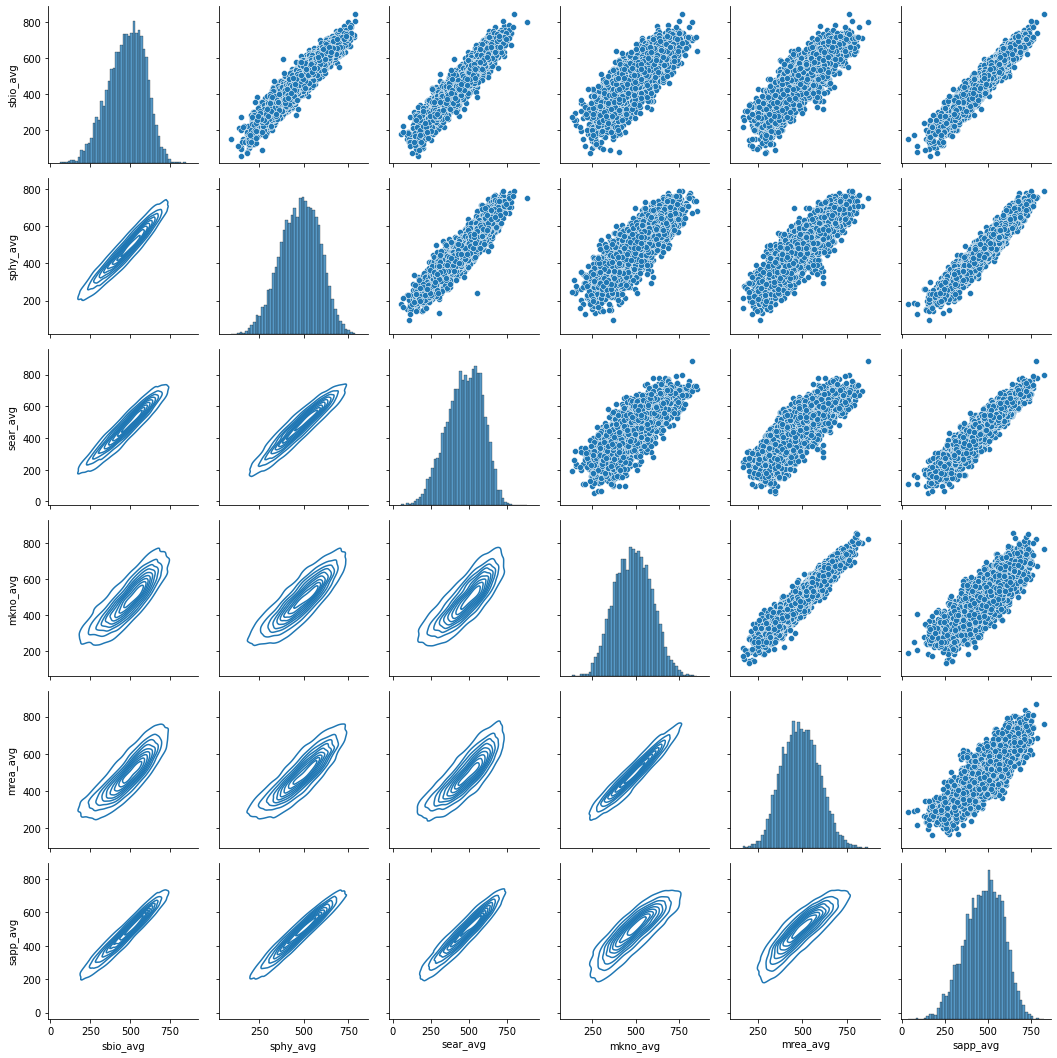

In [102]:
g = sns.PairGrid(stud_ach.sample(10000).loc[:,random.sample([col for col in stud_ach.columns if '_avg' in col],6)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `stud_ach` dataset:**
* 

In [98]:
student.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,BSBG05C,BSBG05D,BSBG05E,BSBG05F,BSBG05G,BSBG05H,BSBG05I,BSBG06A,BSBG06B,BSBG07,BSBG08A,BSBG08B,BSBG09A,BSBG09B,BSBG10,BSBG11A,BSBG11B,BSBG12A,BSBG12B,BSBG12C,BSBG12D,BSBG12E,BSBG12F,IDPOP,IDGRADE,ITLANG_SQ,LCID_SQ,ITLANG_SA,LCID_SA,ITSEX,BSDAGE,BSBGHER,BSDGHER,BSBGSSB,BSDGSSB,BSBGSB,BSDGSB,BSBGSLM,BSDGSLM,BSBGICM,BSDGICM,BSBGDML,BSDGDML,BSBGSCM,BSDGSCM,BSBGSVM,BSDGSVM,BSBGSLS,BSDGSLS,BSBGICS,BSDGICS,BSBGSCS,BSDGSCS,BSBGSVS,BSDGSVS,BSBGSLB,BSDGSLB,BSBGICB,BSDGICB,BSBGSCB,BSDGSCB,BSBGSLE,BSDGSLE,BSBGICE,BSDGICE,BSBGSCE,BSDGSCE,BSBGSLC,BSDGSLC,BSBGICC,BSDGICC,BSBGSCC,BSDGSCC,BSBGSLP,BSDGSLP,BSBGICP,BSDGICP,BSBGSCP,BSDGSCP,BSBGSEC,BSDGSEC,BSDG05S,BSDGEDUP
0,7842.0,Booklet 11,5001.0,500102.0,50010201.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,"<Post-secondary, non-tertiary education—ISCED ...",<Bachelor’s or equivalent level—ISCED Level 6>,Finish <Bachelor’s or equivalent level—ISCED L...,Yes,Yes,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.58,10.84499,Some Resources,12.80573,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.10421,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.68313,Medium Self-Efficacy,Both Own Room and Internet Connection,University or Higher
1,7842.0,Booklet 12,5001.0,500102.0,50010202.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,<Short-cycle tertiary education—ISCED Level 5>,<Short-cycle tertiary education—ISCED Level 5>,Finish <Bachelor’s or equivalent level—ISCED L...,Yes,Yes,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.75,10.23835,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.42832,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.10343,Some Lessons,10.35323,Somewhat Confident in Mathematics,10.34734,Strongly Value Mathematics,10.68878,Very Much Like Learning Science,10.78969,High Clarity of Instruction,10.70197,Somewhat Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.52147,Medium Self-Efficacy,Both Own Room and Internet Connection,Post-secondary but not University
2,7842.0,Booklet 13,5001.0,500102.0,50010203.0,Boy,Always,None or very few (0–10 books),Yes,No,Yes,No,Yes,No,Yes,No,Yes,NaN,<Short-cycle tertiary education—ISCED Level 5>,Finish <Lower secondary education—ISCED Level 2>,Yes,No,Yes,NaN,Never or almost never,Sometimes,Sometimes,Yes,Yes,Yes,Yes,Yes,Yes,Pop 2,Grade 8,English,English (U.A.E. Abu Dhabi),English,English (U.A.E. Abu Dhabi),Male,13.50,9.03613,Some Resources,13.27199,High Sense of School Belonging,12.93734,Never or Almost Never,11.75478,Very Much Like Learning Mathematics,10.38389,High Clarity of Instruction,11.40970,Some Lessons,8.51433,Not Confident in Mathematics,6.48714,Do Not Value Mathematics,10.36663,Somewhat Like Learning Science,10.78969,High Clarity of Instruction,11.39185,Very Confident in Science,12.9367,Strongly Value Science,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.52551,High Self-Efficacy,Either Own Room or Internet Connection,Post-secondary but not University
3,7842.0,Booklet 14,5001.0,500102.0,50010204.0,Boy,Almost always,Enough to fill one shelf (11–25 books),Y

In [205]:
list(student.columns[student.isna().all()])+list(student.columns[student.nunique()==1])

['IDPOP']

In [67]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295453 entries, 0 to 295452
Data columns (total 93 columns):
 #   Column     Non-Null Count   Dtype   
---  ------     --------------   -----   
 0   IDCNTRY    295453 non-null  float64 
 1   IDBOOK     295453 non-null  object  
 2   IDSCHOOL   295453 non-null  float64 
 3   IDCLASS    295453 non-null  float64 
 4   IDSTUD     295453 non-null  float64 
 5   BSBG01     292598 non-null  category
 6   BSBG03     290052 non-null  object  
 7   BSBG04     290351 non-null  category
 8   BSBG05A    290843 non-null  category
 9   BSBG05B    290610 non-null  category
 10  BSBG05C    285147 non-null  object  
 11  BSBG05D    289807 non-null  category
 12  BSBG05E    290379 non-null  category
 13  BSBG05F    266242 non-null  object  
 14  BSBG05G    237077 non-null  object  
 15  BSBG05H    223433 non-null  object  
 16  BSBG05I    203576 non-null  object  
 17  BSBG06A    283039 non-null  object  
 18  BSBG06B    282538 non-null  object  
 19  BS

In [68]:
student.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,BSDAGE,BSBGHER,BSBGSSB,BSBGSB,BSBGSLM,BSBGICM,BSBGDML,BSBGSCM,BSBGSVM,BSBGSLS,BSBGICS,BSBGSCS,BSBGSVS,BSBGSLB,BSBGICB,BSBGSCB,BSBGSLE,BSBGICE,BSBGSCE,BSBGSLC,BSBGICC,BSBGSCC,BSBGSLP,BSBGICP,BSBGSCP,BSBGSEC
count,295453.000000,295453.000000,295453.000000,2.954530e+05,295007.000000,289242.000000,290131.00000,284744.000000,290408.000000,289976.000000,282896.000000,289359.000000,288760.000000,220370.000000,219680.000000,219342.000000,285862.000000,66641.000000,66479.000000,66416.000000,54472.000000,54320.000000,54252.000000,65734.000000,65556.000000,65417.000000,65719.000000,65491.000000,65368.000000,136629.000000
mean,35669.770887,5147.488924,514752.442145,5.147526e+07,14.293059,10.251069,9.86241,9.776433,9.961073,10.072908,9.916083,10.019942,9.840356,10.117461,10.072631,10.079303,10.086556,9.969839,9.932821,9.982285,9.961898,9.964434,9.998950,9.970825,9.948196,9.937674,10.011737,9.969336,10.010515,10.072507
std,150889.861246,129.955610,12995.298104,1.299530e+06,0.816446,1.684202,1.95809,2.017834,1.903557,1.997334,1.992961,2.089437,2.054977,2.027841,1.979049,2.007870,1.910471,2.006163,2.003414,1.984479,2.005631,1.998236,1.993684,2.017648,2.002994,1.990926,2.017097,2.000978,1.988876,1.974740
min,36.000000,5001.000000,500101.000000,5.001010e+07,9.080000,4.552080,3.92440,1.953440,5.094840,3.695680,5.566330,3.277930,3.036820,3.846500,4.022730,3.249920,4.283400,3.770330,3.805730,3.049750,4.020150,4.198000,3.210940,4.381810,4.449820,3.896350,4.500520,4.575930,3.904790,3.210100
25%,380.000000,5057.000000,505701.000000,5.057011e+07,13.750000,9.036130,8.46096,8.357840,8.761390,8.518960,8.705590,8.997360,8.346150,8.696610,8.528200,8.873810,8.817250,8.646750,8.476250,8.768360,8.720260,8.604940,8.807510,8.772590,8.694020,8.784090,8.744740,8.458410,8.918210,8.521470
50%,578.000000,5114.000000,511402.000000,5.114023e+07,14.170000,10.238350,9.40801,9.569750,9.866380,9.926750,9.941130,9.804960,9.654380,9.817230,10.306400,9.615810,9.895320,9.576050,9.939960,9.628410,9.614740,10.090050,9.665740,9.709260,9.753180,9.732660,9.773820,9.829670,9.661350,10.168600
75%,784.000000,5189.000000,518902.000000,5.189020e+07,14.670000,11.487120,11.62252,11.187840,11.148590,11.651150,11.103430,11.104060,11.301900,11.533000,11.431060,11.024140,11.354160,11.404230,11.547870,10.979050,11.265810,11.608490,11.013050,11.138650,11.561420,10.855390,10.993720,11.597720,10.747560,12.565180
max,710004.000000,5631.000000,563102.000000,5.631021e+07,19.000000,13.515430,13.27199,12.937340,13.848490,13.018850,14.673710,15.851880,13.482930,13.517780,12.633860,14.841820,12.936700,13.864760,12.776070,14.925630,14.057380,12.753610,14.910220,13.776840,12.636810,14.721900,13.952830,12.640740,15.003590,12.565180


In [69]:
student.dtypes

IDCNTRY       float64
IDBOOK         object
IDSCHOOL      float64
IDCLASS       float64
IDSTUD        float64
BSBG01       category
BSBG03         object
BSBG04       category
BSBG05A      category
BSBG05B      category
BSBG05C        object
BSBG05D      category
BSBG05E      category
BSBG05F        object
BSBG05G        object
BSBG05H        object
BSBG05I        object
BSBG06A        object
BSBG06B        object
BSBG07         object
BSBG08A        object
BSBG08B      category
BSBG09A      category
BSBG09B      category
BSBG10       category
BSBG11A      category
BSBG11B      category
BSBG12A        object
BSBG12B        object
BSBG12C        object
BSBG12D        object
BSBG12E        object
BSBG12F        object
IDPOP        category
IDGRADE        object
ITLANG_SQ      object
LCID_SQ        object
ITLANG_SA      object
LCID_SA        object
ITSEX        category
BSDAGE        float64
BSBGHER       float64
BSDGHER      category
BSBGSSB       float64
BSDGSSB      category
BSBGSB    

In [192]:
student_codes.loc[student.columns,:].iloc[:,:1]

,Label
IDCNTRY,Country ID - Numeric ISO Code
IDBOOK,Student Test Booklet
IDSCHOOL,School ID
IDCLASS,Class ID
IDSTUD,Student ID
BSBG01,GEN\SEX OF STUDENT
BSBG03,GEN\OFTEN SPEAK <LANG OF TEST> AT HOME
BSBG04,GEN\AMOUNT OF BOOKS IN YOUR HOME
BSBG05A,GEN\HOME POSSESS\COMPUTER TABLET
BSBG05B,GEN\HOME POSSESS\STUDY DESK


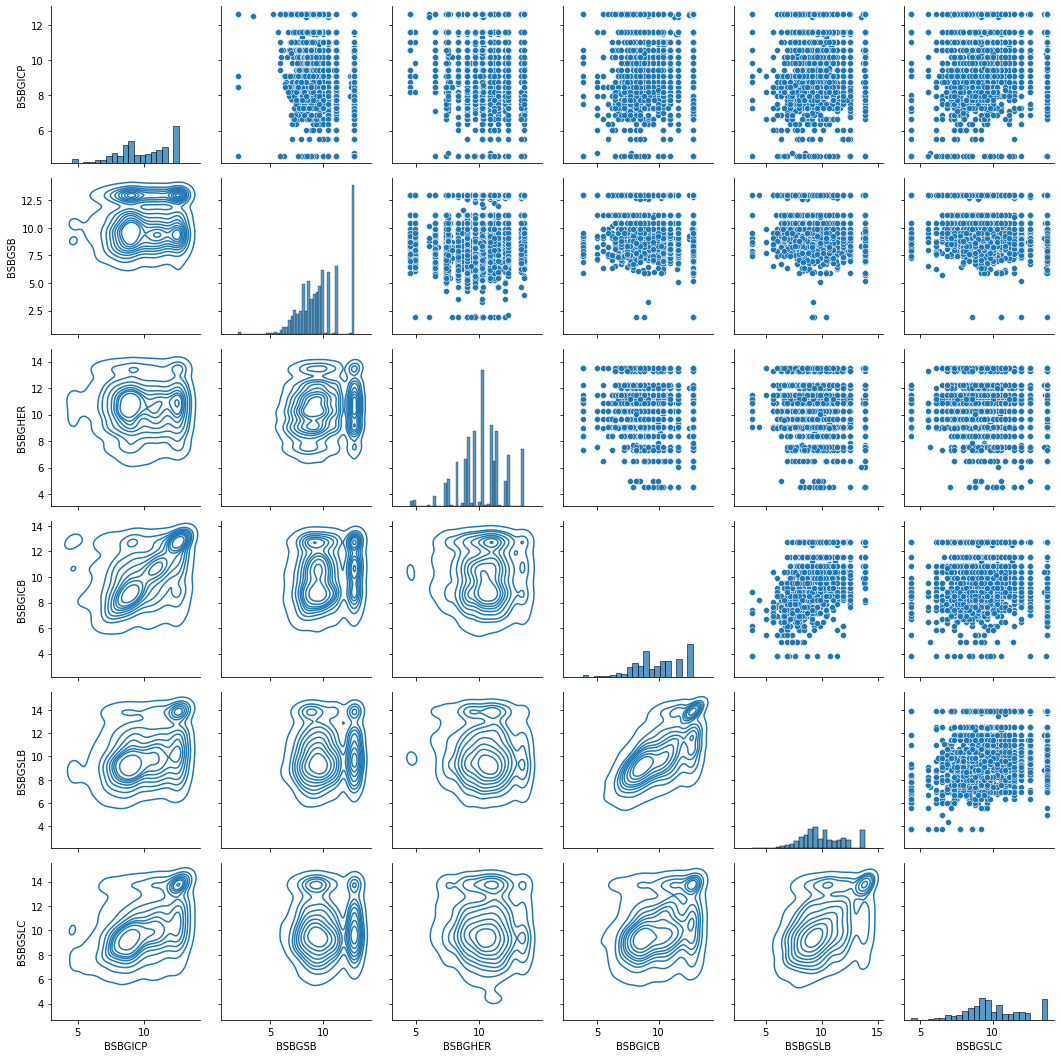

In [119]:
g = sns.PairGrid(student.sample(10000).loc[:,random.sample([col for col in student.columns if 'BSBG' in col and student[col].dtype == 'float64'],6)])
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

**Initial Observations about `student` dataset:**
* 

In [70]:
stud_teach.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,IDTEALIN,IDTEACH,IDLINK,IDPOP,IDGRADE,IDSUBJ,ITCOURSE,NMTEACH,NSTEACH
0,7842.0,Booklet 11,5001.0,500102.0,50010201.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0
1,7842.0,Booklet 11,5001.0,500102.0,50010201.0,50010203.0,500102.0,3.0,Pop 2,Grade 8,Science,Integrated science,1.0,1.0
2,7842.0,Booklet 12,5001.0,500102.0,50010202.0,50010203.0,500102.0,3.0,Pop 2,Grade 8,Science,Integrated science,1.0,1.0
3,7842.0,Booklet 12,5001.0,500102.0,50010202.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0
4,7842.0,Booklet 13,5001.0,500102.0,50010203.0,50010101.0,500101.0,1.0,Pop 2,Grade 8,Mathematics,Mathematics,1.0,1.0


In [208]:
list(stud_teach.columns[stud_teach.isna().all()])+list(stud_teach.columns[stud_teach.nunique()==1])

['IDPOP']

In [188]:
stud_teach.nunique()

IDCNTRY        46
IDBOOK         22
IDSCHOOL      631
IDCLASS      3311
IDSTUD      96976
IDTEALIN     8674
IDTEACH      3995
IDLINK         34
IDPOP           1
IDGRADE         2
IDSUBJ          2
ITCOURSE        9
NMTEACH         7
NSTEACH         9
dtype: int64

In [71]:
stud_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 775679 entries, 0 to 775678
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   IDCNTRY   775679 non-null  float64 
 1   IDBOOK    775679 non-null  object  
 2   IDSCHOOL  775679 non-null  float64 
 3   IDCLASS   775679 non-null  float64 
 4   IDSTUD    775679 non-null  float64 
 5   IDTEALIN  775679 non-null  float64 
 6   IDTEACH   775679 non-null  float64 
 7   IDLINK    775679 non-null  float64 
 8   IDPOP     775679 non-null  category
 9   IDGRADE   775679 non-null  object  
 10  IDSUBJ    775679 non-null  category
 11  ITCOURSE  775679 non-null  object  
 12  NMTEACH   775679 non-null  float64 
 13  NSTEACH   774759 non-null  float64 
dtypes: category(2), float64(9), object(3)
memory usage: 72.5+ MB


In [72]:
stud_teach.describe()

,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,IDTEALIN,IDTEACH,IDLINK,NMTEACH,NSTEACH
count,775679.000000,775679.000000,775679.000000,7.756790e+05,7.756790e+05,775679.000000,775679.000000,775679.000000,774759.000000
mean,37465.527130,5140.928510,514096.189617,5.140963e+07,5.140959e+07,514095.866035,3.895333,1.053588,2.028420
std,153150.434185,123.909897,12390.828566,1.239084e+06,1.239079e+06,12390.789203,7.323645,0.345699,1.280168
min,36.000000,5001.000000,500101.000000,5.001010e+07,5.001010e+07,500101.000000,1.000000,0.000000,0.000000
25%,376.000000,5055.000000,505503.000000,5.055031e+07,5.055021e+07,505502.000000,1.000000,1.000000,1.000000
50%,554.000000,5111.000000,511101.000000,5.111011e+07,5.111010e+07,511101.000000,2.000000,1.000000,1.000000
75%,784.000000,5182.000000,518201.000000,5.182010e+07,5.182010e+07,518201.000000,4.000000,1.000000,3.000000
max,710004.000000,5631.000000,563102.000000,5.631021e+07,5.631030e+07,563103.000000,53.000000,6.000000,8.000000


In [73]:
stud_teach.dtypes

IDCNTRY      float64
IDBOOK        object
IDSCHOOL     float64
IDCLASS      float64
IDSTUD       float64
IDTEALIN     float64
IDTEACH      float64
IDLINK       float64
IDPOP       category
IDGRADE       object
IDSUBJ      category
ITCOURSE      object
NMTEACH      float64
NSTEACH      float64
dtype: object

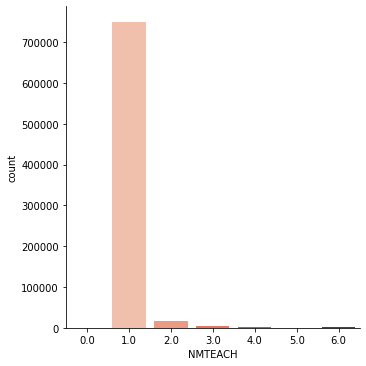

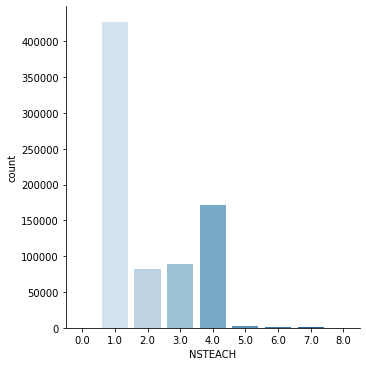

In [137]:
sns.catplot(x='NMTEACH', kind='count', palette='Reds', data=stud_teach);
sns.catplot(x='NSTEACH', kind='count', palette='Blues', data=stud_teach);

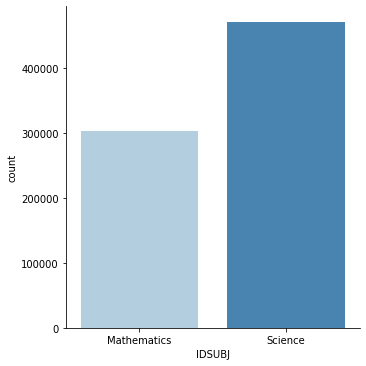

In [128]:
sns.catplot(x="IDSUBJ", kind="count", palette="Blues", data=stud_teach);

**Initial Observations about `stud_teach` dataset:**
* students are morel likey to have multiple science teachers than multiple math teachers
* there are more science teachers in the study than math teachers

In [74]:
math_teach.head()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,ITCOURSE,BTBG01,BTBG02,BTBG03,BTBG04,BTBG05A,BTBG05B,BTBG05C,BTBG05D,BTBG05E,BTBG05F,BTBG05G,BTBG05H,BTBG05I,BTBG06A,BTBG06B,BTBG06C,BTBG06D,BTBG06E,BTBG06F,BTBG06G,BTBG06H,BTBG06I,BTBG06J,BTBG06K,BTBG06L,BTBG07A,BTBG07B,BTBG07C,BTBG07D,BTBG07E,BTBG07F,BTBG07G,BTBG07H,BTBG08A,BTBG08B,BTBG08C,BTBG08D,BTBG08E,BTBG09A,BTBG09B,BTBG09C,BTBG09D,BTBG09E,BTBG09F,BTBG09G,BTBG09H,BTBG10,BTBG11,BTBG12A,BTBG12B,BTBG12C,BTBG12D,BTBG12E,BTBG12F,BTBG12G,BTBG13A,BTBG13B,BTBG13C,BTBG13D,BTBG13E,BTBG13F,BTBG13G,BTBG13H,BTBM14,BTBM15A,BTBM15B,BTBM15C,BTBM15D,BTBM15E,BTBM15F,BTBM15G,BTBM15H,BTBM16,BTBM17A,BTBM17BA,BTBM17BB,BTBM17BC,BTBM17CA,BTBM17CB,BTBM17CC,BTBM17CD,BTBM18AA,BTBM18AB,BTBM18AC,BTBM18BA,BTBM18BB,BTBM18BC,BTBM18BD,BTBM18BE,BTBM18BF,BTBM18BG,BTBM18CA,BTBM18CB,BTBM18CC,BTBM18CD,BTBM18CE,BTBM18CF,BTBM18DA,BTBM18DB,BTBM18DC,BTBM18DD,BTBM18DE,BTBM18DF,BTBM19A,BTBM19B,BTBM19CA,BTBM19CB,BTBM19CC,BTBM19CD,BTBM19CE,BTBM20A,BTBM20B,BTBM20C,BTBM20D,BTBM20E,BTBM21,BTBM22AA,BTBM22BA,BTBM22AB,BTBM22BB,BTBM22AC,BTBM22BC,BTBM22AD,BTBM22BD,BTBM22AE,BTBM22BE,BTBM22AF,BTBM22BF,BTBM22AG,BTBM22BG,BTBM23,IDPOP,IDGRADER,IDGRADE,IDSUBJ,ITLANG_T,LCID_T,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT,VERSION
0,7842.0,5001.0,50010101.0,500101.0,1.0,Mathematics,17.0,Male,40–49,<Master’s or equivalent level—ISCED Level 7>,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Very high,Very high,High,Very high,Low,Low,Low,Medium,Medium,Medium,High,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a little,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little,40.0,18.0,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,A lot,Not at all,Not at all,Some,A lot,Some,Some,Not at all,NaN,Every or almost every lesson,Every or almost every lesson,About half the lessons,Never,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Never,"Yes, with restricted use",No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly taught before this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Every day,15 minutes or less,Always or almost always,Never or almost never,Sometimes,Always or almost always,Sometimes,A lot,A lot,Some,Some,Some,More than once a month,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,Yes,No,16–35 hours,Pop 2,Upper Grade,Grade 8,Mathematics,English,English (U.A.E. Abu Dhabi),10.05102,9.61910,11.78998,11.74559,High Emphasis,Somewhat Limited,Very Safe and Orderly,Very Satisfied,Major in Mathematics and Mathematics Education,100.0,100.00000,100.00000,100.00000,4.0
1,7842.0,5001.0,50010102.0,500101.0,2.0,Mathematics,17.0,Male,40–49,<Master’s or equivalent level—ISCED Level 7>,Yes,No,Yes,Yes,No,Yes,Yes,No,No,Very high,Very high,High,Very high,Low,Low,Low,Medium,Medium,Medium,High,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a little,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Disagree a lot,Disagree a little,Agree a little,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a lot,Disagree a little,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [209]:
list(math_teach.columns[math_teach.isna().all()])+list(math_teach.columns[math_teach.nunique()==1])

['ITCOURSE', 'IDPOP', 'IDGRADER', 'IDSUBJ', 'VERSION']

In [75]:
math_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14571 entries, 0 to 14570
Columns: 157 entries, IDCNTRY to VERSION
dtypes: category(5), float64(17), object(135)
memory usage: 17.0+ MB


In [76]:
math_teach.describe()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,BTBG01,BTBG10,BTBG11,BTBM14,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
count,14571.000000,14571.000000,1.457100e+04,14571.000000,14571.000000,13427.000000,13090.000000,12817.000000,12736.000000,13443.000000,13198.000000,13376.000000,13421.000000,13195.000000,13189.000000,13174.000000,13149.000000
mean,25861.760483,5139.824583,5.139846e+07,513984.606959,2.316039,15.726000,26.273415,3.074744,228.827418,10.264284,9.850015,10.420642,9.971230,98.147026,70.822475,76.294342,59.566127
std,127761.944314,125.107698,1.251051e+06,12510.510896,4.010638,10.505881,10.450771,6.940515,78.152219,2.174719,1.996385,2.154510,1.793995,8.467915,24.651900,23.014936,35.533852
min,36.000000,5001.000000,5.001010e+07,500101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.873410,3.623690,4.426320,5.281180,0.000000,0.000000,0.000000,0.000000
25%,372.000000,5055.000000,5.055010e+07,505501.000000,1.000000,7.000000,20.000000,0.000000,180.000000,8.846900,8.632380,8.783370,8.482860,100.000000,57.142860,66.666670,33.333330
50%,554.000000,5108.000000,5.108050e+07,510805.000000,1.000000,14.000000,26.000000,0.000000,225.000000,10.051020,9.619100,10.072630,10.258740,100.000000,71.428570,83.333330,66.666670
75%,784.000000,5177.000000,5.177010e+07,517701.000000,3.000000,23.000000,31.000000,3.000000,270.000000,11.550050,11.288280,11.789980,11.745590,100.000000,100.000000,100.000000,100.000000
max,710004.000000,5631.000000,5.631020e+07,563102.000000,51.000000,59.000000,118.000000,105.000000,700.000000,17.780680,15.295110,13.870350,11.745590,100.000000,100.000000,100.000000,100.000000


In [77]:
math_teach.dtypes

IDCNTRY      float64
IDSCHOOL     float64
IDTEALIN     float64
IDTEACH      float64
IDLINK       float64
              ...   
BTDMNUM      float64
BTDMALG      float64
BTDMGEO      float64
BTDMDAT      float64
VERSION     category
Length: 157, dtype: object

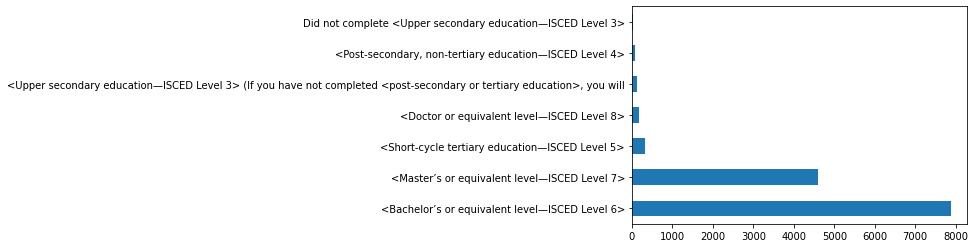

In [181]:
math_teach['BTBG04'].value_counts().plot(kind='barh');

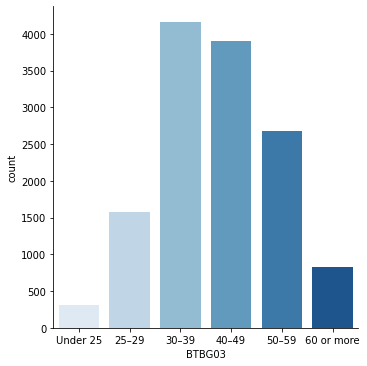

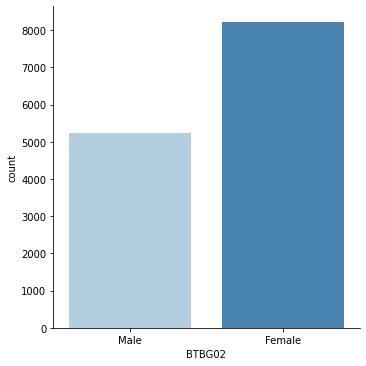

In [162]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
math_teach['BTBG03'] = math_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=math_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=math_teach);

**Initial Observations about `math_teach` dataset:**
* 

In [78]:
sci_teach.head()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,ITCOURSE,BTBG01,BTBG02,BTBG03,BTBG04,BTBG05A,BTBG05B,BTBG05C,BTBG05D,BTBG05E,BTBG05F,BTBG05G,BTBG05H,BTBG05I,BTBG06A,BTBG06B,BTBG06C,BTBG06D,BTBG06E,BTBG06F,BTBG06G,BTBG06H,BTBG06I,BTBG06J,BTBG06K,BTBG06L,BTBG07A,BTBG07B,BTBG07C,BTBG07D,BTBG07E,BTBG07F,BTBG07G,BTBG07H,BTBG08A,BTBG08B,BTBG08C,BTBG08D,BTBG08E,BTBG09A,BTBG09B,BTBG09C,BTBG09D,BTBG09E,BTBG09F,BTBG09G,BTBG09H,BTBG10,BTBG11,BTBG12A,BTBG12B,BTBG12C,BTBG12D,BTBG12E,BTBG12F,BTBG12G,BTBG13A,BTBG13B,BTBG13C,BTBG13D,BTBG13E,BTBG13F,BTBG13G,BTBG13H,BTBS14,BTBS15A,BTBS15B,BTBS15C,BTBS15D,BTBS15E,BTBS15F,BTBS15G,BTBS15H,BTBS15I,BTBS15J,BTBS15K,BTBS15L,BTBS15M,BTBS15N,BTBS16A,BTBS16BA,BTBS16BB,BTBS16BC,BTBS16CA,BTBS16CB,BTBS16CC,BTBS16CD,BTBS17AA,BTBS17AB,BTBS17AC,BTBS17AD,BTBS17AE,BTBS17AF,BTBS17AG,BTBS17BA,BTBS17BB,BTBS17BC,BTBS17BD,BTBS17BE,BTBS17BF,BTBS17BG,BTBS17BH,BTBS17CA,BTBS17CB,BTBS17CC,BTBS17CD,BTBS17CE,BTBS17CF,BTBS17CG,BTBS17DA,BTBS17DB,BTBS17DC,BTBS17DD,BTBS18A,BTBS18B,BTBS18CA,BTBS18CB,BTBS18CC,BTBS18CD,BTBS18CE,BTBS19A,BTBS19B,BTBS19C,BTBS19D,BTBS19E,BTBS20,BTBS21AA,BTBS21BA,BTBS21AB,BTBS21BB,BTBS21AC,BTBS21BC,BTBS21AD,BTBS21BD,BTBS21AE,BTBS21BE,BTBS21AF,BTBS21BF,BTBS21AG,BTBS21BG,BTBS22,IDPOP,IDGRADER,IDGRADE,IDSUBJ,ITLANG_T,LCID_T,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTBSESI,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDSESI,BTDSMSE,BTDSBIO,BTDSCHE,BTDSPHY,BTDSEAR,VERSION
0,7842.0,5001.0,50010203.0,500102.0,3.0,Integrated science,30.0,Male,50–59,<Master’s or equivalent level—ISCED Level 7>,No,Yes,Yes,Yes,Yes,No,Yes,No,No,High,High,Medium,High,Medium,Low,High,Low,Medium,Medium,Medium,Very high,Agree a lot,Agree a lot,Agree a lot,Agree a little,Agree a little,Agree a lot,Agree a lot,Agree a lot,Very often,Very often,Very often,Very often,Very often,Agree a little,Agree a lot,Agree a lot,Agree a little,Agree a lot,Agree a lot,Disagree a lot,Agree a little,38.0,20.0,Every or almost every lesson,About half the lessons,Some lessons,Some lessons,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Some,Not at all,Not at all,Not at all,Some,Some,Some,Not at all,200.0,Every or almost every lesson,About half the lessons,About half the lessons,Every or almost every lesson,About half the lessons,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,Every or almost every lesson,About half the lessons,Every or almost every lesson,Some lessons,About half the lessons,Some lessons,Yes,No,Yes,Yes,Once or twice a week,Once or twice a week,Every or almost every day,Once or twice a week,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Not yet taught or just introduced,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught this year,Mostly taught before this year,Mostly taught before this year,3 or 4 times a week,15 minutes or less,Always or almost always,Sometimes,Always or almost always,Always or almost always,Sometimes,A lot,A lot,A lot,Some,Some,More than once a month,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,16–35 hours,Pop 2,Upper Grade,Grade 8,Science,English,English (U.A.E. Abu Dhabi),9.14714,11.28828,11.78998,11.74559,12.43721,Medium Emphasis,Not Limited,Very Safe and Orderly,Very Satisfied,About Half the Lessons or More,Major in Science and Science Education,100.00000,87.5,100.00000,100.0,4.0
1,7842.0,5001.0,50010204.0,500102.0,4.0,Integrated science,30.0,Male,50–59,<Master’s or equivalent level—ISCED Level 7>,No,Yes,Yes,Yes,Yes,No,Yes,No,No,High,High,Medium,High,Medium,Low,High,Low,Mediu

In [210]:
list(sci_teach.columns[sci_teach.isna().all()])+list(sci_teach.columns[sci_teach.nunique()==1])

['IDPOP', 'IDGRADER', 'IDSUBJ', 'VERSION']

In [79]:
sci_teach.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22648 entries, 0 to 22647
Columns: 168 entries, IDCNTRY to VERSION
dtypes: category(4), float64(18), object(146)
memory usage: 28.4+ MB


In [80]:
sci_teach.describe()

,IDCNTRY,IDSCHOOL,IDTEALIN,IDTEACH,IDLINK,BTBG01,BTBG10,BTBG11,BTBS14,BTBGEAS,BTBGLSN,BTBGSOS,BTBGTJS,BTBSESI,BTDSBIO,BTDSCHE,BTDSPHY,BTDSEAR
count,22648.000000,22648.000000,2.264800e+04,22648.000000,22648.000000,20738.000000,20234.000000,19792.000000,19816.000000,20855.000000,20440.000000,20700.000000,20794.000000,20561.000000,12694.000000,12809.000000,12849.000000,11876.000000
mean,31454.742759,5130.338661,5.130378e+07,513037.700371,5.529981,16.965956,25.370515,2.941188,139.375101,10.238353,10.030577,10.444209,9.826156,9.646790,74.968790,75.931311,70.421378,73.435921
std,139064.866672,112.485862,1.124852e+06,11248.526185,8.923136,11.146168,9.939160,7.179479,78.428047,2.104111,1.979319,2.116645,1.815395,2.190059,23.169797,23.687424,25.143445,34.276024
min,36.000000,5001.000000,5.001010e+07,500101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.873410,3.623690,4.426320,5.281180,6.513090,0.000000,0.000000,0.000000,0.000000
25%,348.000000,5053.000000,5.053071e+07,505307.000000,2.000000,8.000000,20.000000,0.000000,90.000000,8.846900,8.632380,8.783370,8.482860,8.038700,57.142860,62.500000,57.142860,50.000000
50%,458.000000,5106.000000,5.106030e+07,510603.000000,3.000000,15.000000,25.000000,0.000000,120.000000,10.051020,10.145090,10.072630,10.258740,9.836960,71.428570,75.000000,71.428570,100.000000
75%,752.000000,5169.000000,5.169020e+07,516902.000000,5.000000,25.000000,30.000000,3.000000,180.000000,11.550050,11.288280,11.789980,11.745590,10.968860,100.000000,100.000000,100.000000,100.000000
max,710004.000000,5631.000000,5.631030e+07,563103.000000,53.000000,60.000000,117.000000,111.000000,700.000000,17.780680,15.295110,13.870350,11.745590,16.032560,100.000000,100.000000,100.000000,100.000000


In [81]:
sci_teach.dtypes

IDCNTRY      float64
IDSCHOOL     float64
IDTEALIN     float64
IDTEACH      float64
IDLINK       float64
              ...   
BTDSBIO      float64
BTDSCHE      float64
BTDSPHY      float64
BTDSEAR      float64
VERSION     category
Length: 168, dtype: object

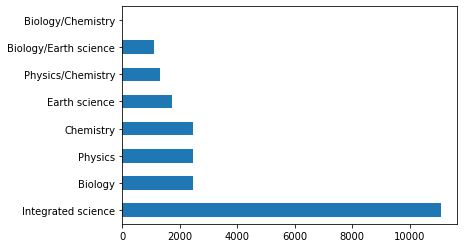

In [180]:
sci_teach['ITCOURSE'].value_counts().plot(kind='barh');

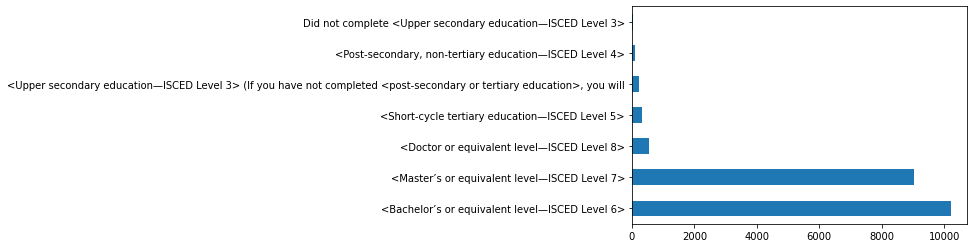

In [179]:
sci_teach['BTBG04'].value_counts().plot(kind='barh');

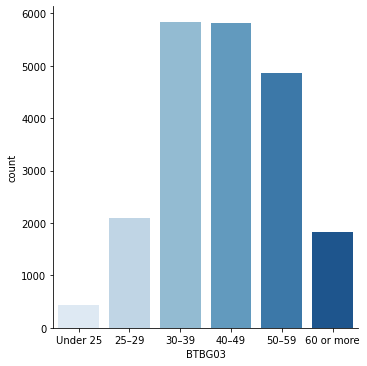

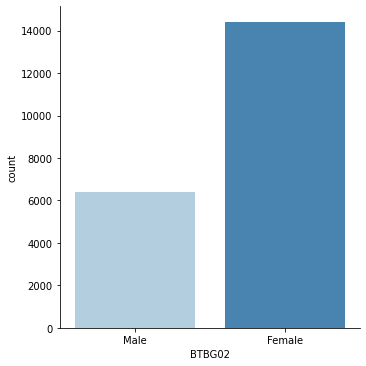

In [174]:
cat_type = CategoricalDtype(categories=['Under 25', '25–29', '30–39', '40–49', '50–59', '60 or more'], ordered=True)
sci_teach['BTBG03'] = sci_teach['BTBG03'].astype(cat_type)
sns.catplot(x='BTBG03', kind='count', palette='Blues', data=sci_teach);
sns.catplot(x='BTBG02', kind='count', palette='Blues', data=sci_teach);

**Initial Observations about `sci_teach` dataset:**
* 

## Data Cleaning Steps
* many variables could be renamed for easier access and recall
    - teacher survey questions
    - student survey questions
    - school survey questions
* many variables need to be converted from strings to ordered categorical for proper visualization and analysis
    - teacher age ranges, teacher education levels
* many variables are floats that could be stored as integers
    - stud_ach scores for individual questions (binary 0 or 1)
* many variables are floats that could be stored as strings
    - id numbers for school, countries, students, and teachers